## Without PCA

In [ ]:
# !cp /content/drive/MyDrive/IUB-Sem2/AML/mnist_test.csv .
# !cp /content/drive/MyDrive/IUB-Sem2/AML/mnist_train.csv .

# !rm mnist_test.csv
# !rm mnist_train.csv

In [1]:
# !cp /content/drive/MyDrive/IUB-Sem2/AML/mnist_train.csv /content/drive/MyDrive/IUB-Sem2/AML/mnist_test.csv .

In [5]:
#Imports
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt

In [3]:
# help(pd.read_csv)

In [ ]:
!wget https://pjreddie.com/media/files/mnist_train.csv

In [6]:
#Read The Data Into Dataframes

tr_df = pd.read_csv('mnist_train.csv', header = None)
te_df = pd.read_csv('mnist_test.csv', header = None)

In [7]:
tr_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
te_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
te_df[0].value_counts()/10000

1    0.1135
2    0.1032
7    0.1028
3    0.1010
9    0.1009
4    0.0982
0    0.0980
8    0.0974
6    0.0958
5    0.0892
Name: 0, dtype: float64

In [10]:
tr_df[0].value_counts()/60000

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: 0, dtype: float64

In [11]:
x_test = te_df.iloc[:,1:]
x_test

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:

y_test = te_df.iloc[:,0]
y_test

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: 0, Length: 10000, dtype: int64

In [13]:
x_train = tr_df.iloc[:,1:]
x_train

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y_train = tr_df.iloc[:,0]
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: 0, Length: 60000, dtype: int64

In [52]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [54]:
# %%time
# model.fit(x_train,y_train)

CPU times: user 45.9 s, sys: 48.8 ms, total: 45.9 s
Wall time: 45.7 s


RandomForestClassifier()

In [41]:
import timeit
st = timeit.default_timer()
model.fit(x_train,y_train)
et = timeit.default_timer() - st

In [42]:
print('Time Taken To Train without PCA:',round(et,2),'seconds')

Time Taken To Train without PCA: 45.63 seconds


In [17]:
#Get Test Set Predictions
preds = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 968,    0,    0,    0,    0,    2,    4,    1,    4,    1],
       [   0, 1123,    2,    3,    0,    2,    3,    0,    1,    1],
       [   8,    0, 1000,    6,    1,    0,    2,    9,    5,    1],
       [   0,    0,   12,  972,    0,    6,    0,    9,   10,    1],
       [   1,    0,    1,    0,  958,    0,    4,    0,    3,   15],
       [   2,    0,    1,   14,    2,  858,    7,    1,    6,    1],
       [   6,    3,    0,    0,    3,    8,  935,    0,    3,    0],
       [   1,    3,   22,    2,    1,    0,    0,  987,    2,   10],
       [   3,    0,    7,    8,    4,    5,    4,    4,  932,    7],
       [   6,    5,    1,   11,   12,    2,    1,    4,    7,  960]])

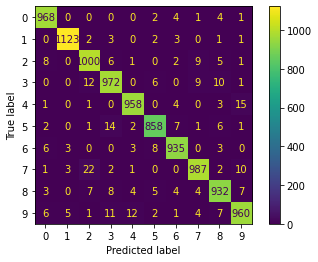

CPU times: user 511 ms, sys: 0 ns, total: 511 ms
Wall time: 520 ms


In [19]:
%%time
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

In [20]:
#Overall Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds)
print('Total Test Accuracy =',round(acc*100,2),'%')

Total Test Accuracy = 96.93 %


## With PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
xpd_train = pca.fit_transform(x_train)
xpd_train.shape
pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

In [28]:
# xpd_train = pca.transform(x_train)
evr = pca.explained_variance_ratio_
evr.shape

(784,)

In [32]:
for i in range(1,785):
  total_evr = sum(evr[:i])
  tevr = round(total_evr,4) * 100
  if round(tevr) == 85 or round(tevr) == 90 or round(tevr) == 95:
    print('Number of components:',i)
    print('Total Explained Variance Ratio',total_evr, '%')
    print()

Number of components: 57
Total Explained Variance Ratio 0.8450653325355515 %

Number of components: 58
Total Explained Variance Ratio 0.847650057990682 %

Number of components: 59
Total Explained Variance Ratio 0.8501877639284683 %

Number of components: 60
Total Explained Variance Ratio 0.8526355735244742 %

Number of components: 84
Total Explained Variance Ratio 0.8961422153830987 %

Number of components: 85
Total Explained Variance Ratio 0.8974806868072436 %

Number of components: 86
Total Explained Variance Ratio 0.8988046501416065 %

Number of components: 87
Total Explained Variance Ratio 0.9001062226425088 %

Number of components: 88
Total Explained Variance Ratio 0.901364953537941 %

Number of components: 89
Total Explained Variance Ratio 0.9025932351354229 %

Number of components: 90
Total Explained Variance Ratio 0.9038090799926424 %

Number of components: 91
Total Explained Variance Ratio 0.9049794246115551 %

Number of components: 144
Total Explained Variance Ratio 0.9454558

- As we can see in the above results we get explained variance ratios of 85%, 90% and 95% when the number of principal components is 59, 88 and 155 respectively.

### Number of Principal Components = 59                and Explained Variance Ratio = 85%

In [15]:
#Train Set Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=59)
pca.fit(x_train)
xpd_train = pca.transform(x_train)
xpd_train.shape

(60000, 59)

In [16]:
sum(pca.explained_variance_ratio_)*100

85.01635890588089

In [17]:
#Test Set Transformation
from sklearn.decomposition import PCA
xpd_test = pca.transform(x_test)
xpd_test.shape

(10000, 59)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_pcd = RandomForestClassifier()

In [44]:
import timeit
st = timeit.default_timer()
model_pcd.fit(xpd_train,y_train)
et = timeit.default_timer() - st

In [45]:
print('Explained Variance Ratio =','85%')
print('Time Taken To Train with PCA:',round(et,2),'seconds')

Explained Variance Ratio = 85%
Time Taken To Train with PCA: 66.41 seconds


In [51]:
# %%time
# #Train The Model

# model_pcd.fit(xpd_train,y_train)


CPU times: user 1min 6s, sys: 56.3 ms, total: 1min 6s
Wall time: 1min 6s


RandomForestClassifier()

In [55]:
preds = model_pcd.predict(xpd_test)

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 965,    0,    3,    0,    0,    2,    6,    1,    3,    0],
       [   0, 1120,    3,    4,    0,    0,    4,    1,    3,    0],
       [   8,    0,  981,   10,    3,    1,    4,    6,   17,    2],
       [   1,    0,    6,  953,    1,   18,    2,    9,   16,    4],
       [   1,    3,    5,    0,  931,    2,    7,    3,    3,   27],
       [   4,    1,    2,   15,    5,  844,   11,    1,    5,    4],
       [   9,    3,    0,    0,    3,    6,  936,    0,    1,    0],
       [   2,    6,   18,    2,    7,    0,    0,  977,    1,   15],
       [   5,    0,    5,   20,    8,   18,    4,    6,  901,    7],
       [  11,    5,    3,   10,   22,    5,    0,    9,    7,  937]])

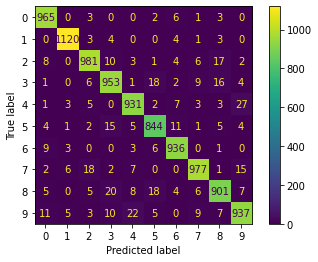

CPU times: user 384 ms, sys: 13.1 ms, total: 397 ms
Wall time: 394 ms


In [57]:
%%time
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

In [58]:
#Overall Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds)
print('Total Accuracy =',round(acc*100,2),'%')

Total Accuracy = 95.45 %


### Number of Principal Components = 88                and Explained Variance Ratio = 90%

In [61]:
#Train Set Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=88)
pca.fit(x_train)
xpd_train = pca.transform(x_train)
xpd_train.shape

(60000, 88)

In [62]:
sum(pca.explained_variance_ratio_)*100

90.10513184455546

In [63]:
#Test Set Transformation
from sklearn.decomposition import PCA
xpd_test = pca.transform(x_test)
xpd_test.shape

(10000, 88)

In [64]:
from sklearn.ensemble import RandomForestClassifier
model_pcd = RandomForestClassifier()

In [65]:
import timeit
st = timeit.default_timer()
model_pcd.fit(xpd_train,y_train)
et = timeit.default_timer() - st

In [66]:
print('Explained Variance Ratio =','90%')
print('Time Taken To Train with PCA:',round(et,2),'seconds')

Explained Variance Ratio = 90%
Time Taken To Train with PCA: 85.93 seconds


In [67]:
preds = model_pcd.predict(xpd_test)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 965,    0,    2,    0,    0,    3,    6,    2,    2,    0],
       [   0, 1119,    2,    5,    0,    1,    3,    0,    5,    0],
       [   9,    0,  967,   13,    6,    1,    2,    8,   23,    3],
       [   1,    0,    7,  956,    1,   15,    1,    8,   17,    4],
       [   1,    2,    4,    1,  937,    4,    9,    2,    3,   19],
       [   4,    1,    4,   20,    5,  842,    7,    1,    3,    5],
       [   8,    3,    2,    0,    4,    7,  934,    0,    0,    0],
       [   1,    8,   18,    1,    8,    0,    1,  972,    2,   17],
       [   6,    0,    8,   17,    8,   18,    4,    7,  899,    7],
       [   2,    7,    2,   12,   30,    7,    2,   11,    8,  928]])

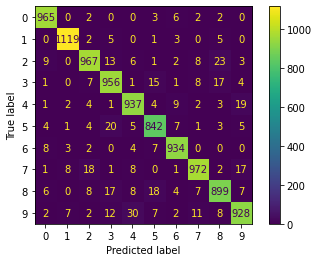

CPU times: user 394 ms, sys: 26 ms, total: 420 ms
Wall time: 411 ms


In [69]:
%%time
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

In [70]:
#Overall Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds)
print('Total Accuracy =',round(acc*100,2),'%')

Total Accuracy = 95.19 %


### Number of Principal Components = 155                and Explained Variance Ratio = 95%

In [83]:
#Train Set Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=155)
pca.fit(x_train)
xpd_train = pca.transform(x_train)
xpd_train.shape

(60000, 155)

In [84]:
sum(pca.explained_variance_ratio_)*100

95.02664404562117

In [85]:
#Test Set Transformation
from sklearn.decomposition import PCA
xpd_test = pca.transform(x_test)
xpd_test.shape

(10000, 155)

In [86]:
from sklearn.ensemble import RandomForestClassifier
model_pcd = RandomForestClassifier()

In [87]:
import timeit
st = timeit.default_timer()
model_pcd.fit(xpd_train,y_train)
et = timeit.default_timer() - st

In [88]:
print('Explained Variance Ratio =','95%')
print('Time Taken To Train with PCA:',round(et,2),'seconds')

Explained Variance Ratio = 95%
Time Taken To Train with PCA: 111.23 seconds


In [89]:
preds = model_pcd.predict(xpd_test)

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 965,    0,    2,    0,    0,    4,    6,    1,    2,    0],
       [   0, 1119,    4,    4,    0,    0,    3,    1,    4,    0],
       [   8,    0,  964,   12,    9,    1,    1,   12,   23,    2],
       [   3,    0,   11,  947,    1,   16,    1,    9,   17,    5],
       [   0,    1,    6,    0,  932,    5,    9,    1,    5,   23],
       [   6,    1,    3,   24,    9,  827,   10,    3,    5,    4],
       [   7,    2,    1,    0,    3,    7,  936,    1,    1,    0],
       [   1,    5,   21,    2,    9,    0,    0,  968,    3,   19],
       [   7,    1,    8,   22,    9,   17,    2,    6,  893,    9],
       [   7,    6,    5,   13,   25,    1,    1,    8,    7,  936]])

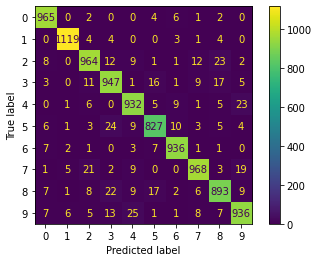

CPU times: user 389 ms, sys: 20.2 ms, total: 409 ms
Wall time: 402 ms


In [91]:
%%time
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, preds)
plt.show()

In [92]:
#Overall Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, preds)
print('Total Accuracy =',round(acc*100,2),'%')

Total Accuracy = 94.87 %


Without PCA 
training time 45.63 s
total accuracy 96.93

85% PCA n = 59
training time 66.41s
total accuracy 95.45%

90% n=88
tt 85.93s
total accuracy 95.19%

95% n = 155
tt 111.23s total accuracy 94.87% 

## Results and Discussion

### Effect of PCA on the data and training time
- As we perform PCA with different explained variance ratios, we notice that we need to increase the number of principal components that are considered (ex: 59, 88 and 155 for achieving total explained variance ratios of 85%, 90% and 95%) this allows us to drastically reduce the number of dimensions in the data. For example in the first case the number of dimensions is reduced by more than 90% (from 784 to 59). 

- Furthermore, the training time required increases, as expected, as we increase the number of principal components considered (training times of 66.41 seconds, 85.93 seconds and 111.23 seconds for explained variance rartios of 85%, 90% and 95%). 

- However, the training time increases when compared to the initial training time without any PCA applied (45.53 seconds). This could be due to the fact that the nature of the data changes as we apply PCA. For example, we can observe from the below cells that initially,  the pixel values are only positive, range from 0-255 and most pixel features have very little variance. But after applying PCA, the features have negative values, very large and small values, substantial variance and different means. One could consider applying Standardization to deal with this issue.


### Performance Differences

- As expected we are able to achieve a decent accuracy inspite of substantially reducing the number of dimensions in the input data. 

- We obtain a total accuracy of 95.45%, 95.19% and 94.87% for explained variance ratios of 85%, 90% and 95%. These accuracies are less than the intial total accuracy obtained without any PCA, i.e. 96.93%. 

- Although this fact is expected, surprisingly we also observe that increasing the number of principal components slightly reduces the total accuracy. 

- This could be due the fact that the variance observed and captured in the training set might not be representative of all possible data, especially the data present in the test set, creating imperfect transformations affecting the generalizing performance as we increase the number of features.

In [ ]:
#Data Before Applying PCA
x_train.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
#Data After Applying PCA
pd.DataFrame(xpd_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,-2.386997e-14,1.198756e-13,4.054073e-14,-3.545324e-14,1.712787e-14,-4.597306e-14,1.828463e-16,3.594162e-14,5.753359e-14,4.537526e-14,...,1.937768e-15,-1.110993e-15,1.445836e-14,-6.280014e-16,3.782693e-15,6.144774e-15,3.358795e-16,-9.486930e-16,-9.623591e-15,-3.617136e-15
std,5.768229e+02,4.932382e+02,4.598993e+02,4.298562e+02,4.085668e+02,3.845061e+02,3.349301e+02,3.144430e+02,3.077276e+02,2.842707e+02,...,4.044614e+01,4.041512e+01,4.008739e+01,3.976643e+01,3.950461e+01,3.933768e+01,3.903100e+01,3.883565e+01,3.845185e+01,3.823093e+01
min,-1.081660e+03,-1.382344e+03,-1.436722e+03,-1.507422e+03,-1.312603e+03,-1.231031e+03,-1.108619e+03,-1.097439e+03,-1.128416e+03,-1.004865e+03,...,-2.005479e+02,-1.963157e+02,-1.970280e+02,-1.817968e+02,-1.893571e+02,-1.790905e+02,-1.745246e+02,-1.685372e+02,-1.909479e+02,-1.692842e+02
25%,-3.961154e+02,-3.632475e+02,-3.258419e+02,-3.106282e+02,-2.744186e+02,-2.676456e+02,-2.390431e+02,-2.122294e+02,-2.174474e+02,-1.806476e+02,...,-2.616945e+01,-2.575139e+01,-2.520912e+01,-2.581560e+01,-2.525039e+01,-2.549849e+01,-2.515364e+01,-2.519833e+01,-2.483075e+01,-2.459938e+01
50%,-4.880459e+01,-8.477327e+01,1.187456e+01,-4.151630e-01,1.076010e+01,9.219539e+00,-1.586477e+01,-2.652915e+01,-1.214827e+01,1.282591e+01,...,-3.749570e-01,1.318373e-01,-2.557396e-01,1.720251e-02,5.987700e-03,4.041052e-01,-3.117489e-01,3.248507e-01,-1.892569e-01,-7.302989e-02
75%,3.323645e+02,3.828954e+02,3.188309e+02,2.698765e+02,2.789281e+02,2.693299e+02,2.250922e+02,1.985305e+02,2.075074e+02,2.000040e+02,...,2.590101e+01,2.585638e+01,2.529029e+01,2.549090e+01,2.504505e+01,2.543414e+01,2.508647e+01,2.534030e+01,2.458887e+01,2.443035e+01
max,2.363324e+03,1.465939e+03,1.505098e+03,1.580330e+03,1.403114e+03,1.296190e+03,1.281072e+03,1.174719e+03,1.496913e+03,1.026997e+03,...,2.068835e+02,2.191392e+02,2.915654e+02,2.038493e+02,2.523557e+02,1.900264e+02,2.110963e+02,1.927111e+02,2.018737e+02,2.098596e+02


## References (Part 2)

The following sources were referred to while answering Question 2.

- https://www.youtube.com/watch?v=NP9fxX4GEdo
- https://www.youtube.com/watch?v=x9pIM2GkbF4
- https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
- https://python-course.eu/machine-learning/training-and-testing-with-mnist.php
- https://www.kaggle.com/datasets/oddrationale/mnist-in-csv\
- https://stackoverflow.com/questions/43307653/measure-runtime-of-a-jupyter-notebook-code-cell
- https://www.youtube.com/watch?v=x9pIM2GkbF4
- https://www.analyticsvidhya.com/blog/2021/11/pca-on-mnist-dataset/
- https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22
- https://pjreddie.com/projects/mnist-in-csv/